In [5]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# Excel A-D (0-3) are features. E (4) is the label.
columns = ['A', 'B', 'C', 'D', 'E']
df = pandas.read_excel('..//data//TrainingData.xlsx', header=None,names=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Label'])

In [18]:
df.head(10)

,Feature1,Feature2,Feature3,Feature4,Label
0,7.7,3.8,6.7,2.2,2
1,5.0,2.3,3.3,1.0,3
2,5.0,3.4,1.6,0.4,1
3,4.9,3.1,1.5,0.2,1
4,5.4,3.9,1.3,0.4,1
5,5.2,3.4,1.4,0.2,1
6,6.3,2.5,5.0,1.9,2
7,6.7,3.1,4.7,1.5,3
8,6.0,3.4,4.5,1.6,3
9,6.7,3.1,5.6,2.4,2


In [25]:
numrows, numcolumns = df.shape
data_types = df.dtypes
summary = df.describe()
print("Number of rows: ", numrows)
print("Number of columns: ", numcolumns)
print("Data types: ", data_types)
print("Summary: ", summary)

Number of rows:  120
Number of columns:  5
Data types:  Feature1     object
Feature2    float64
Feature3    float64
Feature4     object
Label         int64
dtype: object
Summary:           Feature2    Feature3       Label
count  120.000000  120.000000  120.000000
mean     3.052500    3.850833    2.008333
std      0.417065    2.083589    0.824986
min      2.200000    1.000000    1.000000
25%      2.800000    1.600000    1.000000
50%      3.000000    4.400000    2.000000
75%      3.300000    5.100000    3.000000
max      4.400000   16.000000    3.000000


In [40]:
df.isna().sum()


Feature1    0
Feature2    0
Feature3    0
Feature4    0
Label       0
dtype: int64

In [27]:
#Assume All data are supposed to be numeric.
df = df.apply(pandas.to_numeric, errors='coerce')
nan_counts = df.isna().sum()
print(nan_counts)

Feature1    2
Feature2    0
Feature3    0
Feature4    1
Label       0
dtype: int64


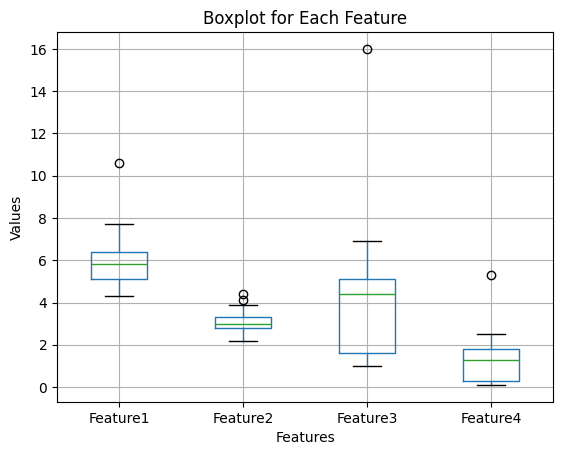

In [28]:
# Draw boxplots for each feature
df.drop(columns=['Label']).boxplot()
plt.title('Boxplot for Each Feature')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [29]:
df.describe()

,Feature1,Feature2,Feature3,Feature4,Label
count,118.000000,120.000000,120.000000,119.000000,120.000000
mean,5.878814,3.052500,3.850833,1.236975,2.008333
std,0.915848,0.417065,2.083589,0.851705,0.824986
min,4.300000,2.200000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.400000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,10.600000,4.400000,16.000000,5.300000,3.000000


In [30]:
# Calculate IQR and identify outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

print("\nOutliers for each feature:")
for column in df.columns:
    if column != 'Label':
        outlier_values = df[column][outliers[column]]
        print(f"\n{column} outliers:")
        print(outlier_values)


Outliers for each feature:

Feature1 outliers:
95    10.6
Name: Feature1, dtype: float64

Feature2 outliers:
52    4.1
97    4.4
Name: Feature2, dtype: float64

Feature3 outliers:
90    16.0
Name: Feature3, dtype: float64

Feature4 outliers:
116    5.3
Name: Feature4, dtype: float64


/var/folders/y0/n_4qtv412193d16p33qfv5t40000gn/T/ipykernel_5010/1897787101.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~outliers.any(axis=1)]


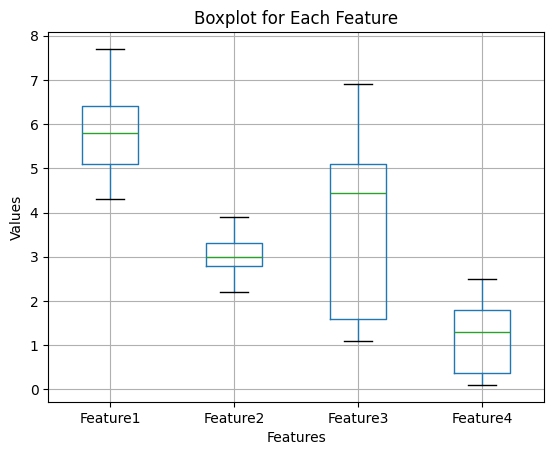

In [41]:
# Remove outliers
df = df[~outliers.any(axis=1)]
df.dropna(inplace=True)
df.drop(columns=['Label']).boxplot()
plt.title('Boxplot for Each Feature')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb_classifier =GaussianNB()
X = df.drop(columns=['Label'])
y = df['Label']
nb_classifier.fit(X, y)
class_prior = nb_classifier.class_prior_
means = nb_classifier.theta_
variances = nb_classifier.var_


print("\nClass Priors:")
for i, prior in enumerate(class_prior):
    print(f"Class {nb_classifier.classes_[i]}: {prior}")

print("\nMeans for each feature per class:")
for i, mean in enumerate(means):
    print(f"Class {nb_classifier.classes_[i]}: {mean}")

print("\nVariances for each feature per class:")
for i, variance in enumerate(variances):
    print(f"Class {nb_classifier.classes_[i]}: {variance}")



Class Priors:
Class 1: 0.32142857142857145
Class 2: 0.33035714285714285
Class 3: 0.3482142857142857

Means for each feature per class:
Class 1: [4.98055556 3.36111111 1.47777778 0.25555556]
Class 2: [6.55405405 2.94594595 5.55135135 2.01081081]
Class 3: [5.96153846 2.78205128 4.30769231 1.34358974]

Variances for each feature per class:
Class 1: [0.09545525 0.10848766 0.03006173 0.01246914]
Class 2: [0.42951059 0.08194303 0.33439007 0.06961286]
Class 3: [0.24698225 0.09429323 0.22686391 0.03733071]


In [ ]:
df_test = pandas.read_excel('..//data//TestData.xlsx', header=None, names=['Feature1', 'Feature2', 'Feature3', 'Feature4'])
df_test['Predicted Label'] = nb_classifier.predict(df_test)

In [65]:
df_test

,Feature1,Feature2,Feature3,Feature4,Predicted Label
0,4.8,3.1,1.6,0.2,1
1,5.1,3.5,1.4,0.3,1
2,4.8,3.0,1.4,0.1,1
3,5.7,3.8,1.7,0.3,1
4,5.5,4.2,1.4,0.2,1
5,5.0,3.4,1.5,0.2,1
6,4.6,3.1,1.5,0.2,1
7,5.8,4.0,1.2,0.2,1
8,5.0,3.6,1.4,0.2,1
9,4.6,3.4,1.4,0.3,1
